In [107]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns

In [72]:
df=pd.read_csv("titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [74]:
df.shape

(891, 12)

In [75]:
# see distinct values in the Sex column
df.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [76]:
# see distinct values in the Survived column
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [77]:
# see distinct values in the Embarked column
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [78]:
# Checking for missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# there are only 891 rows in the titanic data frame. Cabin is almost all missing values, 
# so we can drop that variable completely, 

# but what about age? 
# Age seems like a relevant predictor for survival right? We'd want to keep the variables, 
# but it has 177 missing values.  

# Need to find a way to approximate for those missing values!

In [ ]:
# drop all the variables that aren't relevant for predicting survival. 
# We should at least keep the following:

# Survived - This variable is obviously relevant.
# Pclass   - Does a passenger's class on the boat affect their survivability?
# Sex      - Could a passenger's gender impact their survival rate?
# Age      - Does a person's age impact their survival rate?
# SibSp    - Does the number of relatives on the boat (that are siblings or a spouse) 
#            affect a person survivability? Probability
# Parch    - Does the number of relatives on the boat (that are children or parents) 
#            affect a person survivability? Probability
# Fare     - Does the fare a person paid effect his survivability? Maybe - let's keep it.
# Embarked - Does a person's point of embarkation matter? 
#            It depends on how the boat was filled... Let's keep it.

In [ ]:
# What about a person's name, ticket number, and passenger ID number? 
# They're irrelavant for predicting survivability. 
# And as you recall, the cabin variable is almost all missing values, 
# so we can just drop all of these.

In [79]:
df= df.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


/usr/local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 576x432 with 0 Axes>

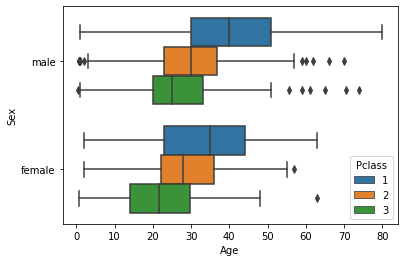

<Figure size 576x432 with 0 Axes>

In [80]:
sns.boxplot(df.Age,df.Sex,df.Pclass)
plt.figure(figsize=[8,6])

In [81]:
# now we need to deal with the missing values in the age variable.

# Speaking roughly, we could say that the younger a passenger is, the more likely it is for them 
# to be in 3rd class. The older a passenger is, the more likely it is for them to be in 1st class. So there is a loose relationship between these variables. So, let's write a function that approximates a passengers age, based on their class. From the box plot, it looks like the average age of 1st class passengers is about 37, 2nd class passengers is 29, and 3rd class pasengers is 24.

# find each null value in the Age variable and for each null, checks the value of the Pclass 
# and assigns an age value according to the average age of passengers in that class.
def age_approx(cols):
    Age    = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age
    

In [ ]:
# avg age per class
# df_train[df_train['Pclass']== 1]['Age'].mean()
# df_train[df_train['Pclass']== 2]['Age'].mean()
# df_train[df_train['Pclass']== 3]['Age'].mean()

In [82]:
df.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [83]:
df['Age'] = df[['Age', 'Pclass']].apply(age_approx, axis=1)

In [84]:
# check for null again
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [85]:
# There are 2 null values in the embarked variable. We can drop those 2 records without 
# loosing too much important information from our dataset, so we will do that.
df.dropna(inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [86]:
# object signifies they are of categorical/string type data
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [110]:
# Converting categorical variables to a dummy indicators
df_dummied= pd.get_dummies(df, columns=['Sex'])
df_dummied = pd.get_dummies(df_dummied, columns=["Embarked"])

In [111]:
df_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


<AxesSubplot:>

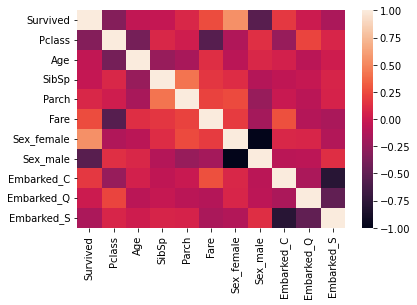

In [112]:
# Checking for independence between features
plt.figure(figsize=(6,4))
sns.heatmap(df_dummied.corr()) 

In [113]:
# Split dataset in training and test datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [90]:
used_features =[
    "Pclass",
    "Age",
    "SibSp",
    "Parch",
    "Sex_female",
    "Sex_male",
    "Embarked_C",
    "Embarked_Q",
    "Embarked_S"
]

X = df_dummied[used_features].values
y = df_dummied['Survived']

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=11)

In [93]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


In [94]:
Lr = LogisticRegression()

In [95]:
# Train classifier
Lr.fit(X_train, y_train)

LogisticRegression()

In [96]:
y_pred = Lr.predict(X_test)

In [114]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [115]:
metrics.confusion_matrix(y_test, y_pred)

array([[142,  19],
       [ 23,  83]])

In [116]:
metrics.accuracy_score(y_test, y_pred)

0.8426966292134831

In [117]:
len(X_test)

267

In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       161
           1       0.81      0.78      0.80       106

    accuracy                           0.84       267
   macro avg       0.84      0.83      0.83       267
weighted avg       0.84      0.84      0.84       267



In [119]:
Lr.coef_

array([[-1.17594833, -0.03843506, -0.25144897, -0.14218586,  1.18428779,
        -1.1851612 ,  0.18793341,  0.12976291, -0.31856973]])

In [120]:
Lr.intercept_

array([3.91717312])

In [121]:
df_dummied[used_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [122]:
Lr.predict_proba(X_test)

array([[0.36232827, 0.63767173],
       [0.93269908, 0.06730092],
       [0.54602023, 0.45397977],
       [0.48123041, 0.51876959],
       [0.84174565, 0.15825435],
       [0.84302636, 0.15697364],
       [0.56296531, 0.43703469],
       [0.14039062, 0.85960938],
       [0.06718606, 0.93281394],
       [0.8304066 , 0.1695934 ],
       [0.5565808 , 0.4434192 ],
       [0.86349996, 0.13650004],
       [0.8304066 , 0.1695934 ],
       [0.15653777, 0.84346223],
       [0.23415018, 0.76584982],
       [0.85332879, 0.14667121],
       [0.86294405, 0.13705595],
       [0.57833881, 0.42166119],
       [0.07357476, 0.92642524],
       [0.91248207, 0.08751793],
       [0.41087852, 0.58912148],
       [0.63017225, 0.36982775],
       [0.87230996, 0.12769004],
       [0.81053205, 0.18946795],
       [0.88461154, 0.11538846],
       [0.88924944, 0.11075056],
       [0.88461154, 0.11538846],
       [0.46931932, 0.53068068],
       [0.69475847, 0.30524153],
       [0.93398233, 0.06601767],
       [0.